In [2]:
import pandas as pd
import numpy as np
import nltk
from sklearn.preprocessing import MinMaxScaler
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from collections import Counter
import matplotlib.pyplot as plt
import itertools
from wordcloud import WordCloud
from PIL import Image
from textblob import TextBlob
from transformers import AutoModelForSequenceClassification
from transformers import TFAutoModelForSequenceClassification
from transformers import AutoTokenizer
import numpy as np
from scipy.special import softmax
import csv
import urllib.request

<h1>Loading the data

In [40]:
#Loading the data
def load_data():
    data = pd.read_csv("tweets.csv")[:500]
    return data

In [4]:
df2 = load_data()
df2

/var/folders/g9/hkd92dbd5zn6plc65t5br2p40000gn/T/ipykernel_2165/2857418959.py:2: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("tweets.csv")[:500]


,user_name,text,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,hashtags,source
0,Bohmle,"#GPT4 for FREE. \nNo its not a clickbait, @Qol...",Carkingga,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,AI enthusiast,2019-07-03 03:44:41+00:00,60.0,349.0,611,False,2023-05-17 18:11:12+00:00,"['GPT4', 'ChatGPT4']",Twitter Web App,NaN,NaN
2,Dan Bruno AI,ChatGPT Thinks These 5 Crypto Coins Will Explo...,"Manchester, NH","The latest in #ChatGPT, #BARD, #Bing, and othe...",2021-05-19 01:19:32+00:00,470.0,157.0,5185,False,2023-05-17 18:11:03+00:00,"['chatgpt', 'AI', 'openAI']",dlvr.it
3,Georgiana Comsa,New: @JWVance's post about 5 #startups (includ...,Palo Alto,"Founder of Silicon Valley PR, award-winning PR...",2008-12-24 09:32:23+00:00,3864.0,1883.0,2415,False,2023-05-17 18:10:25+00:00,"['startups', 'startup50']",Twitter Web App
4,Bitone Great,🚨Get Out!🚨\n💰#Binance Spot💰\n⬇ Recommendation:...,Hong Kong,#ChatGPT (AI) powered Free Trading Signal! \nL...,2022-11-21 04:42:18+00:00,1517.0,506.0,64,False,2023-05-17 18:09:39+00:00,"['Binance', 'Short', 'GHSTUSDT']",rsi1
...,...,...,...,...,...,...,...,...,...,...,...,...
495,O'Dwyer's PR News,#ChatGPT set off an endless stream of fear and...,"New York, NY","The #1 news outlet for public relations, publi...",2009-02-25 15:50:27+00:00,15013.0,2876.0,1,False,2023-05-17 16:00:37+00:00,['ChatGPT'],Twitter Web App
496,"Tracy Krauss, #author #artist #playwright",ChatGPT is a hot topic; there is no doubt. It ...,"British Columbia, Canada",I write modern Christian romance with a twist ...,2010-06-19 04:45:43+00:00,2718.0,1803.0,348,False,2023-05-17 16:00:37+00:00,NaN,Hootsuite Inc.
497,Tom Solid,Exciting news! #chatGPT has launched its Plugi...,Germany,🚀✨ We help you to build your productivity syst...,2010-12-04 11:00:53+00:00,3460.0,332.0,4464,False,2023-05-17 16:00:30+00:00,['chatGPT'],Hootsuite Inc.
498,Tweeting Monk,@Oncrawl Agreed! The #ChatGPT is definitely th...,GET 30% OFF FOR 3 MONTHS,Set your Twitter account on auto-pilot and wat...,2022-03-30 10:35:13+00:00,50.0,111.0,64,False,2023-05-17 16:00:28+00:00,['ChatGPT'],TweetingMonk


<h1>Preprocessing

In [5]:
#Remove nan values
def drop_nul(data):
    data = data.dropna()
    return data

In [6]:
#Remove duplicates
def remove_duplicates(data):
    data = data.drop_duplicates().reset_index()
    return data

In [7]:
#Normalize
def Normalize(data):
    scaler = MinMaxScaler()
    cols_to_norm = ["user_followers", "user_friends", "user_favourites"]
    data[cols_to_norm] = scaler.fit_transform(data[cols_to_norm])
    return data

In [8]:
#remove stopwords and punctuation
def remove_stopwords_punc(text_list):
    stop_words = set(stopwords.words('english'))
    
    final_tokens = []
    for text in text_list:
        words = word_tokenize(text)
        no_stop = []
        
        for w in words:
            if w not in stop_words and w.isalpha():
                no_stop.append(w)
        
        final_tokens.append(no_stop)
    return final_tokens    

In [9]:
#applying stemming
def apply_stemming(words_list):
    stemmer = PorterStemmer()
    final_stems = [[stemmer.stem(w) for w in text] for text in words_list]
    return final_stems

In [10]:
#applying lematization
def apply_lemmatization(text_list):
    lemmatizer = WordNetLemmatizer()
    final_lem = [[lemmatizer.lemmatize(token) for token in text] for text in text_list]
    return final_lem

In [11]:
#removing all links in data
def remove_links(text_list):
    final_text = []
    for text in text_list:
        words = []
        for t in text:
            if t != 'https':
                words.append(t)
        final_text.append(words)
    return  final_text

In [12]:
df = drop_nul(df2)
df = remove_duplicates(df)
df = Normalize(df)
df["stop_words_punc_removed"] = remove_stopwords_punc(df["text"])
df["stems"] = apply_stemming(df["stop_words_punc_removed"])
df["lems"] = apply_lemmatization(df["stop_words_punc_removed"])
df["rem_links"] = remove_links(df["stop_words_punc_removed"])

In [13]:
df        

,index,user_name,text,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,hashtags,source,stop_words_punc_removed,stems,lems,rem_links
0,2,Dan Bruno AI,ChatGPT Thinks These 5 Crypto Coins Will Explo...,"Manchester, NH","The latest in #ChatGPT, #BARD, #Bing, and othe...",2021-05-19 01:19:32+00:00,0.000221,0.001395,0.014656,False,2023-05-17 18:11:03+00:00,"['chatgpt', 'AI', 'openAI']",dlvr.it,"[ChatGPT, Thinks, These, Crypto, Coins, Will, ...","[chatgpt, think, these, crypto, coin, will, ex...","[ChatGPT, Thinks, These, Crypto, Coins, Will, ...","[ChatGPT, Thinks, These, Crypto, Coins, Will, ..."
1,3,Georgiana Comsa,New: @JWVance's post about 5 #startups (includ...,Palo Alto,"Founder of Silicon Valley PR, award-winning PR...",2008-12-24 09:32:23+00:00,0.001823,0.016732,0.006826,False,2023-05-17 18:10:25+00:00,"['startups', 'startup50']",Twitter Web App,"[New, JWVance, post, startups, including, Vcin...","[new, jwvanc, post, startup, includ, vcinityin...","[New, JWVance, post, startup, including, Vcini...","[New, JWVance, post, startups, including, Vcin..."
2,4,Bitone Great,🚨Get Out!🚨\n💰#Binance Spot💰\n⬇ Recommendation:...,Hong Kong,#ChatGPT (AI) powered Free Trading Signal! \nL...,2022-11-21 04:42:18+00:00,0.000716,0.004496,0.000181,False,2023-05-17 18:09:39+00:00,"['Binance', 'Short', 'GHSTUSDT']",rsi1,"[Out, Binance, Recommendation, Short, Ticker, ...","[out, binanc, recommend, short, ticker, ghstus...","[Out, Binance, Recommendation, Short, Ticker, ...","[Out, Binance, Recommendation, Short, Ticker, ..."
3,6,ScrapeLogo: acquired by RiteKit in 2015,Video : Show a company's logo based on the web...,"Prague, Czech Republic",Test RiteKit #RESTAPI solutions in demo page. ...,2015-01-31 04:13:07+00:00,0.000083,0.000480,0.000774,False,2023-05-17 18:09:04+00:00,['Short'],RiteKit App,"[Video, Show, company, logo, based, website, d...","[video, show, compani, logo, base, websit, dom...","[Video, Show, company, logo, based, website, d...","[Video, Show, company, logo, based, website, d..."
4,7,vigilance.eth™️ 0x676D | 🇨🇦🇮🇪🇬🇧🇨🇵,I just used my #CerberusGPT HologeneticsLab an...,"London, ON",🇨🇦 #blockchain #ai #ChatGPT #promptcraft 🤖wiza...,2021-01-30 21:03:36+00:00,0.000058,0.002657,0.025264,False,2023-05-17 18:09:00+00:00,['CerberusGPT'],Twitter Web App,"[I, used, CerberusGPT, HologeneticsLab, simula...","[i, use, cerberusgpt, hologeneticslab, simul, ...","[I, used, CerberusGPT, HologeneticsLab, simula...","[I, used, CerberusGPT, HologeneticsLab, simula..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,493,Kristina Lucrezia Cornèr,"am i that lucky, or #chatGPT constantly makes ...","Veneto, Italy","See beyond, question more, believe in impossib...",2018-02-12 12:17:29+00:00,0.001429,0.004292,0.003118,False,2023-05-17 16:00:54+00:00,['chatGPT'],Twitter Web App,"[lucky, chatGPT, constantly, makes, errors, er...","[lucki, chatgpt, constantli, make, error, erro...","[lucky, chatGPT, constantly, make, error, erro...","[lucky, chatGPT, constantly, makes, errors, er..."
270,494,Janice Portal | AI Enthusiast | Virtual Assistant,"Hi everyone, just want to share again my AI-ge...","Boracay, Philippines","Part-time Freelancer, Crypto & AI Enthusiast, ...",2023-03-07 16:18:50+00:00,0.000006,0.000658,0.000093,False,2023-05-17 16:00:40+00:00,"['ChatGPT', 'OPENAI']",Twitter Web App,"[Hi, everyone, want, share, blogs, https, Chat...","[hi, everyon, want, share, blog, http, chatgpt...","[Hi, everyone, want, share, blog, http, ChatGP...","[Hi, everyone, want, share, blogs, ChatGPT, OP..."
271,495,O'Dwyer's PR News,#ChatGPT set off an endless stream of fear and...,"New York, NY","The #1 news outlet for public relations, publi...",2009-02-25 15:50:27+00:00,0.007085,0.025556,0.000003,False,2023-05-17 16:00:37+00:00,['ChatGPT'],Twitter Web App,"[ChatGPT, set, endless, stream, fear, despair,...","[chatgpt, set, endless, stream, fear, despair,...","[ChatGPT, set, endless, strea

<h1>N-Gram Analysis

In [41]:
#make bigrams and count repeating ones
def count_bigrams(sentences):
    bigram_freq = nltk.FreqDist()
    for sentence in sentences:
        bigrams_in_sentence = list(nltk.ngrams(sentence, 2))
        bigram_freq.update(bigrams_in_sentence)
    return bigram_freq

In [42]:
#make trigrams and count repeating ones
def count_trigrams(sentences):
    trigrams_freq = nltk.FreqDist()
    for sentence in sentences:
        trigrams_in_sentence = list(nltk.ngrams(sentence, 3))
        trigrams_freq.update(trigrams_in_sentence)
    return trigrams_freq

In [16]:
def plot_data(data):
    grams = [d[0] for d in data]
    value = [d[1] for d in data]
    
    plt.figure(figsize=(40, 20))
    x_pos = np.arange(len(grams)) 
    
    plt.bar(x_pos, value,align='center')
    plt.xticks(x_pos, grams) 
    plt.ylabel('Popularity Score')
    plt.show()

In [43]:
#word cloud
def plot_cloud(data):
    text = " ".join(list(itertools.chain.from_iterable(data)))
    
    wordcloud = WordCloud(width= 500, height = 300, random_state=1, 
                      background_color='salmon', colormap='Pastel1', collocations=False).generate(text)
    
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off")

In [18]:
bigrams = count_bigrams(df["rem_links"]).most_common(10)
trigrams = count_trigrams(df["rem_links"]).most_common(10)

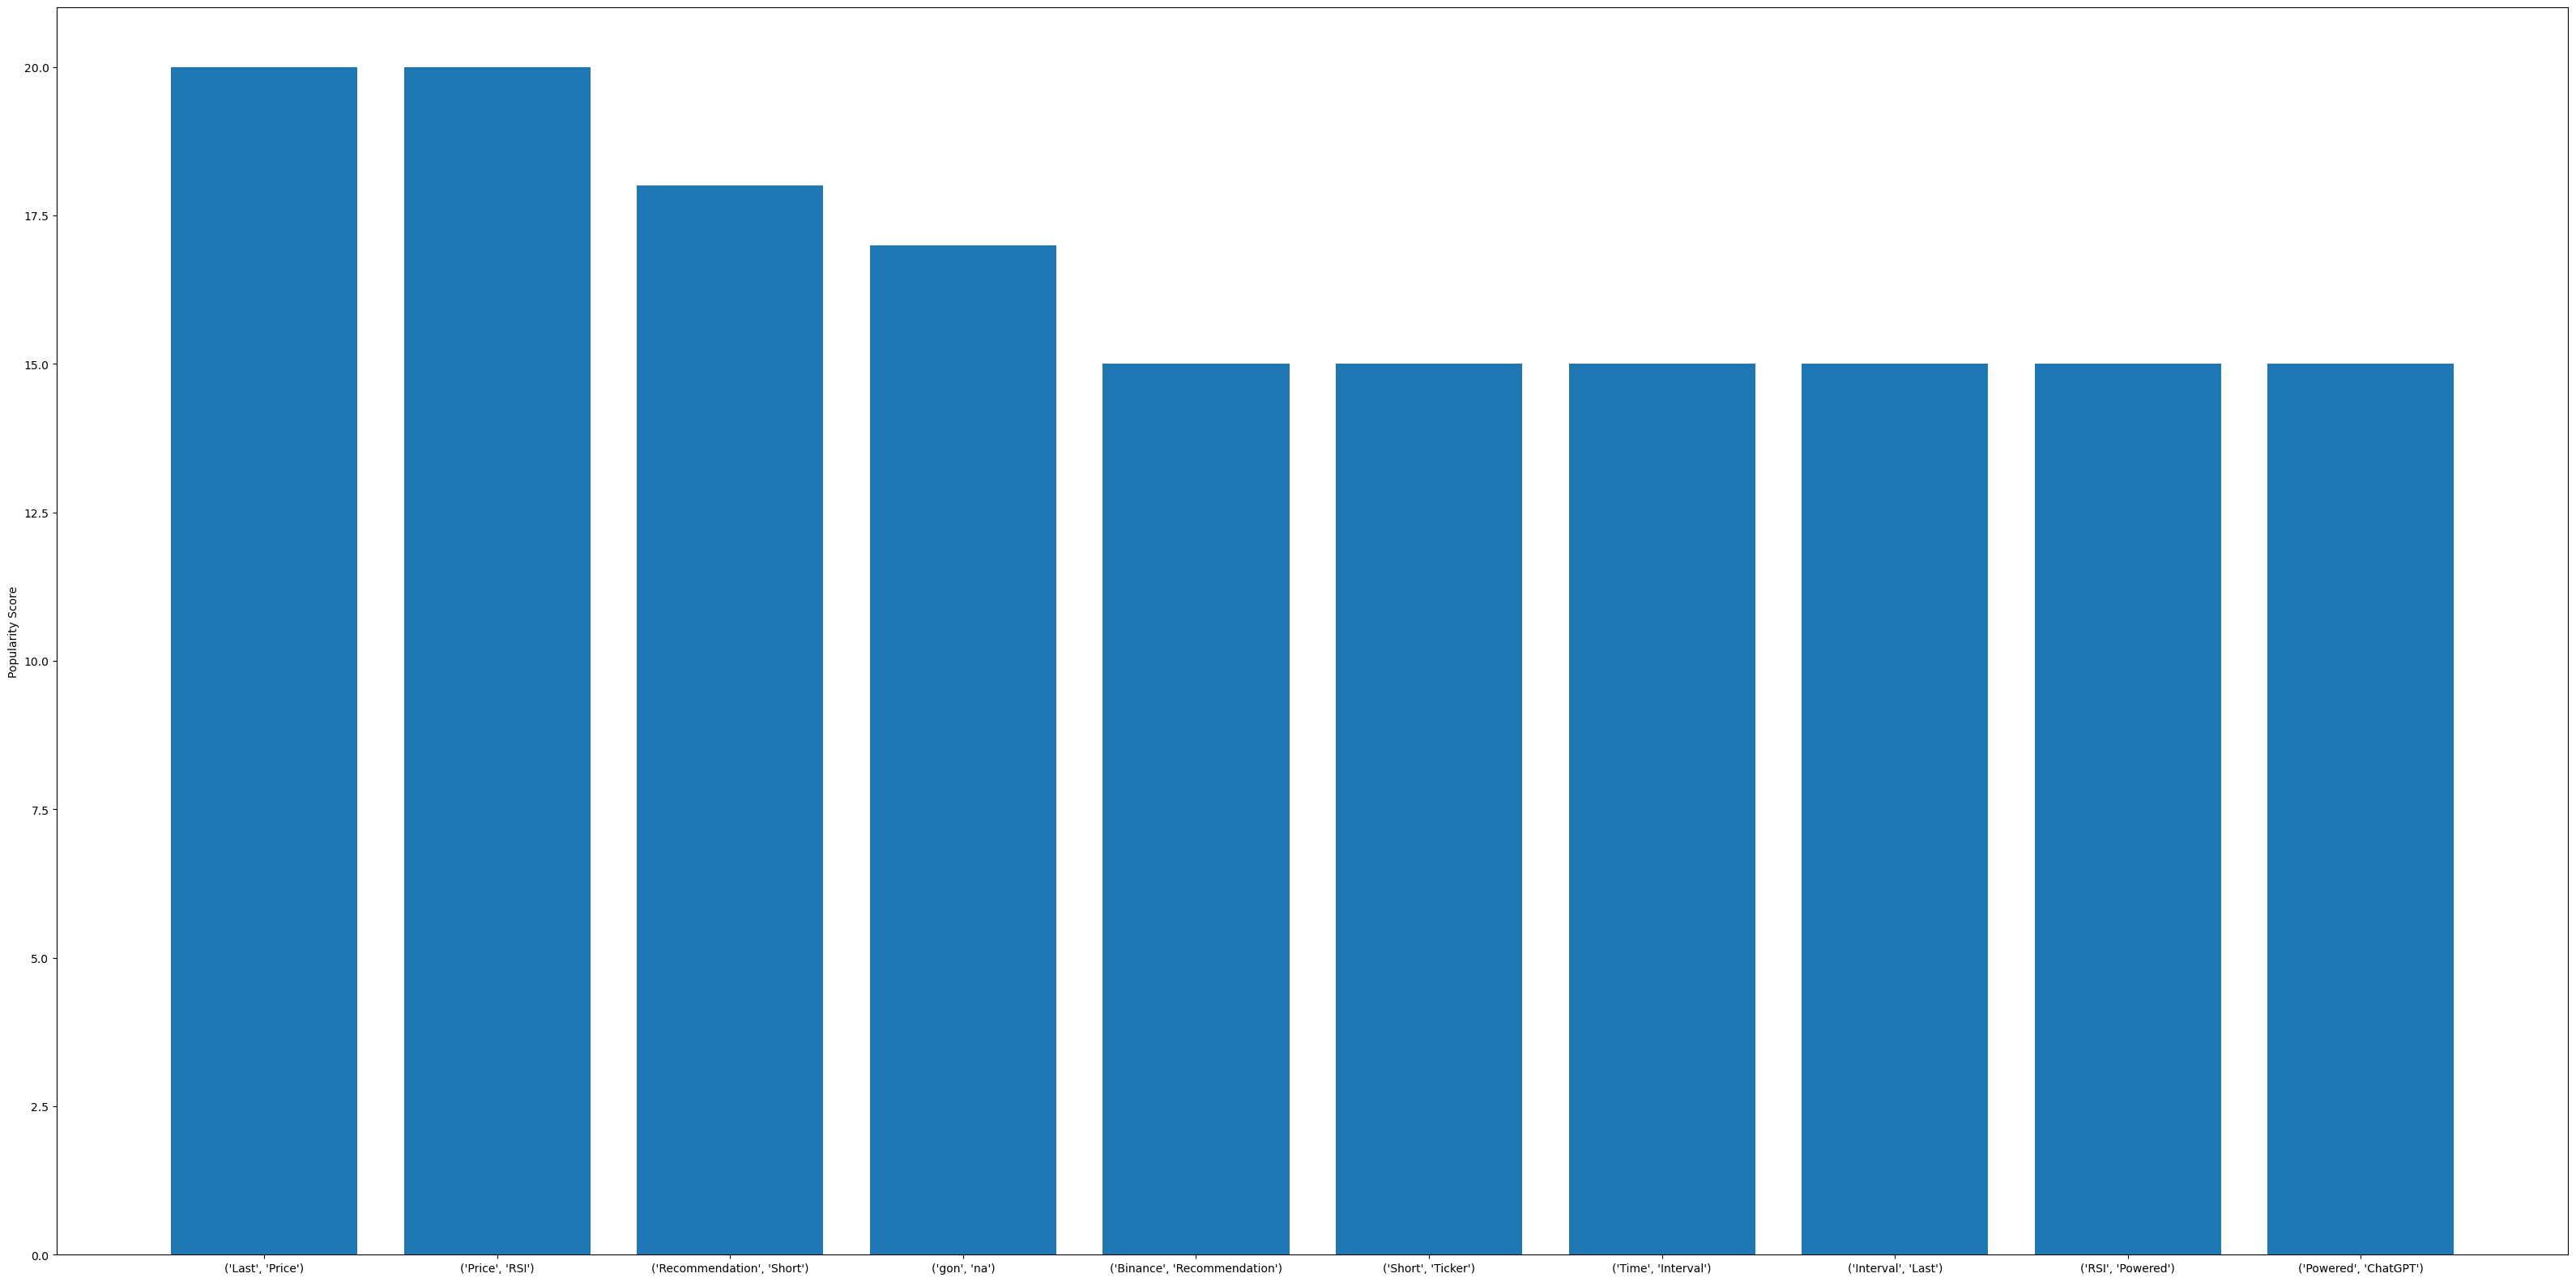

In [19]:
plot_data(bigrams)

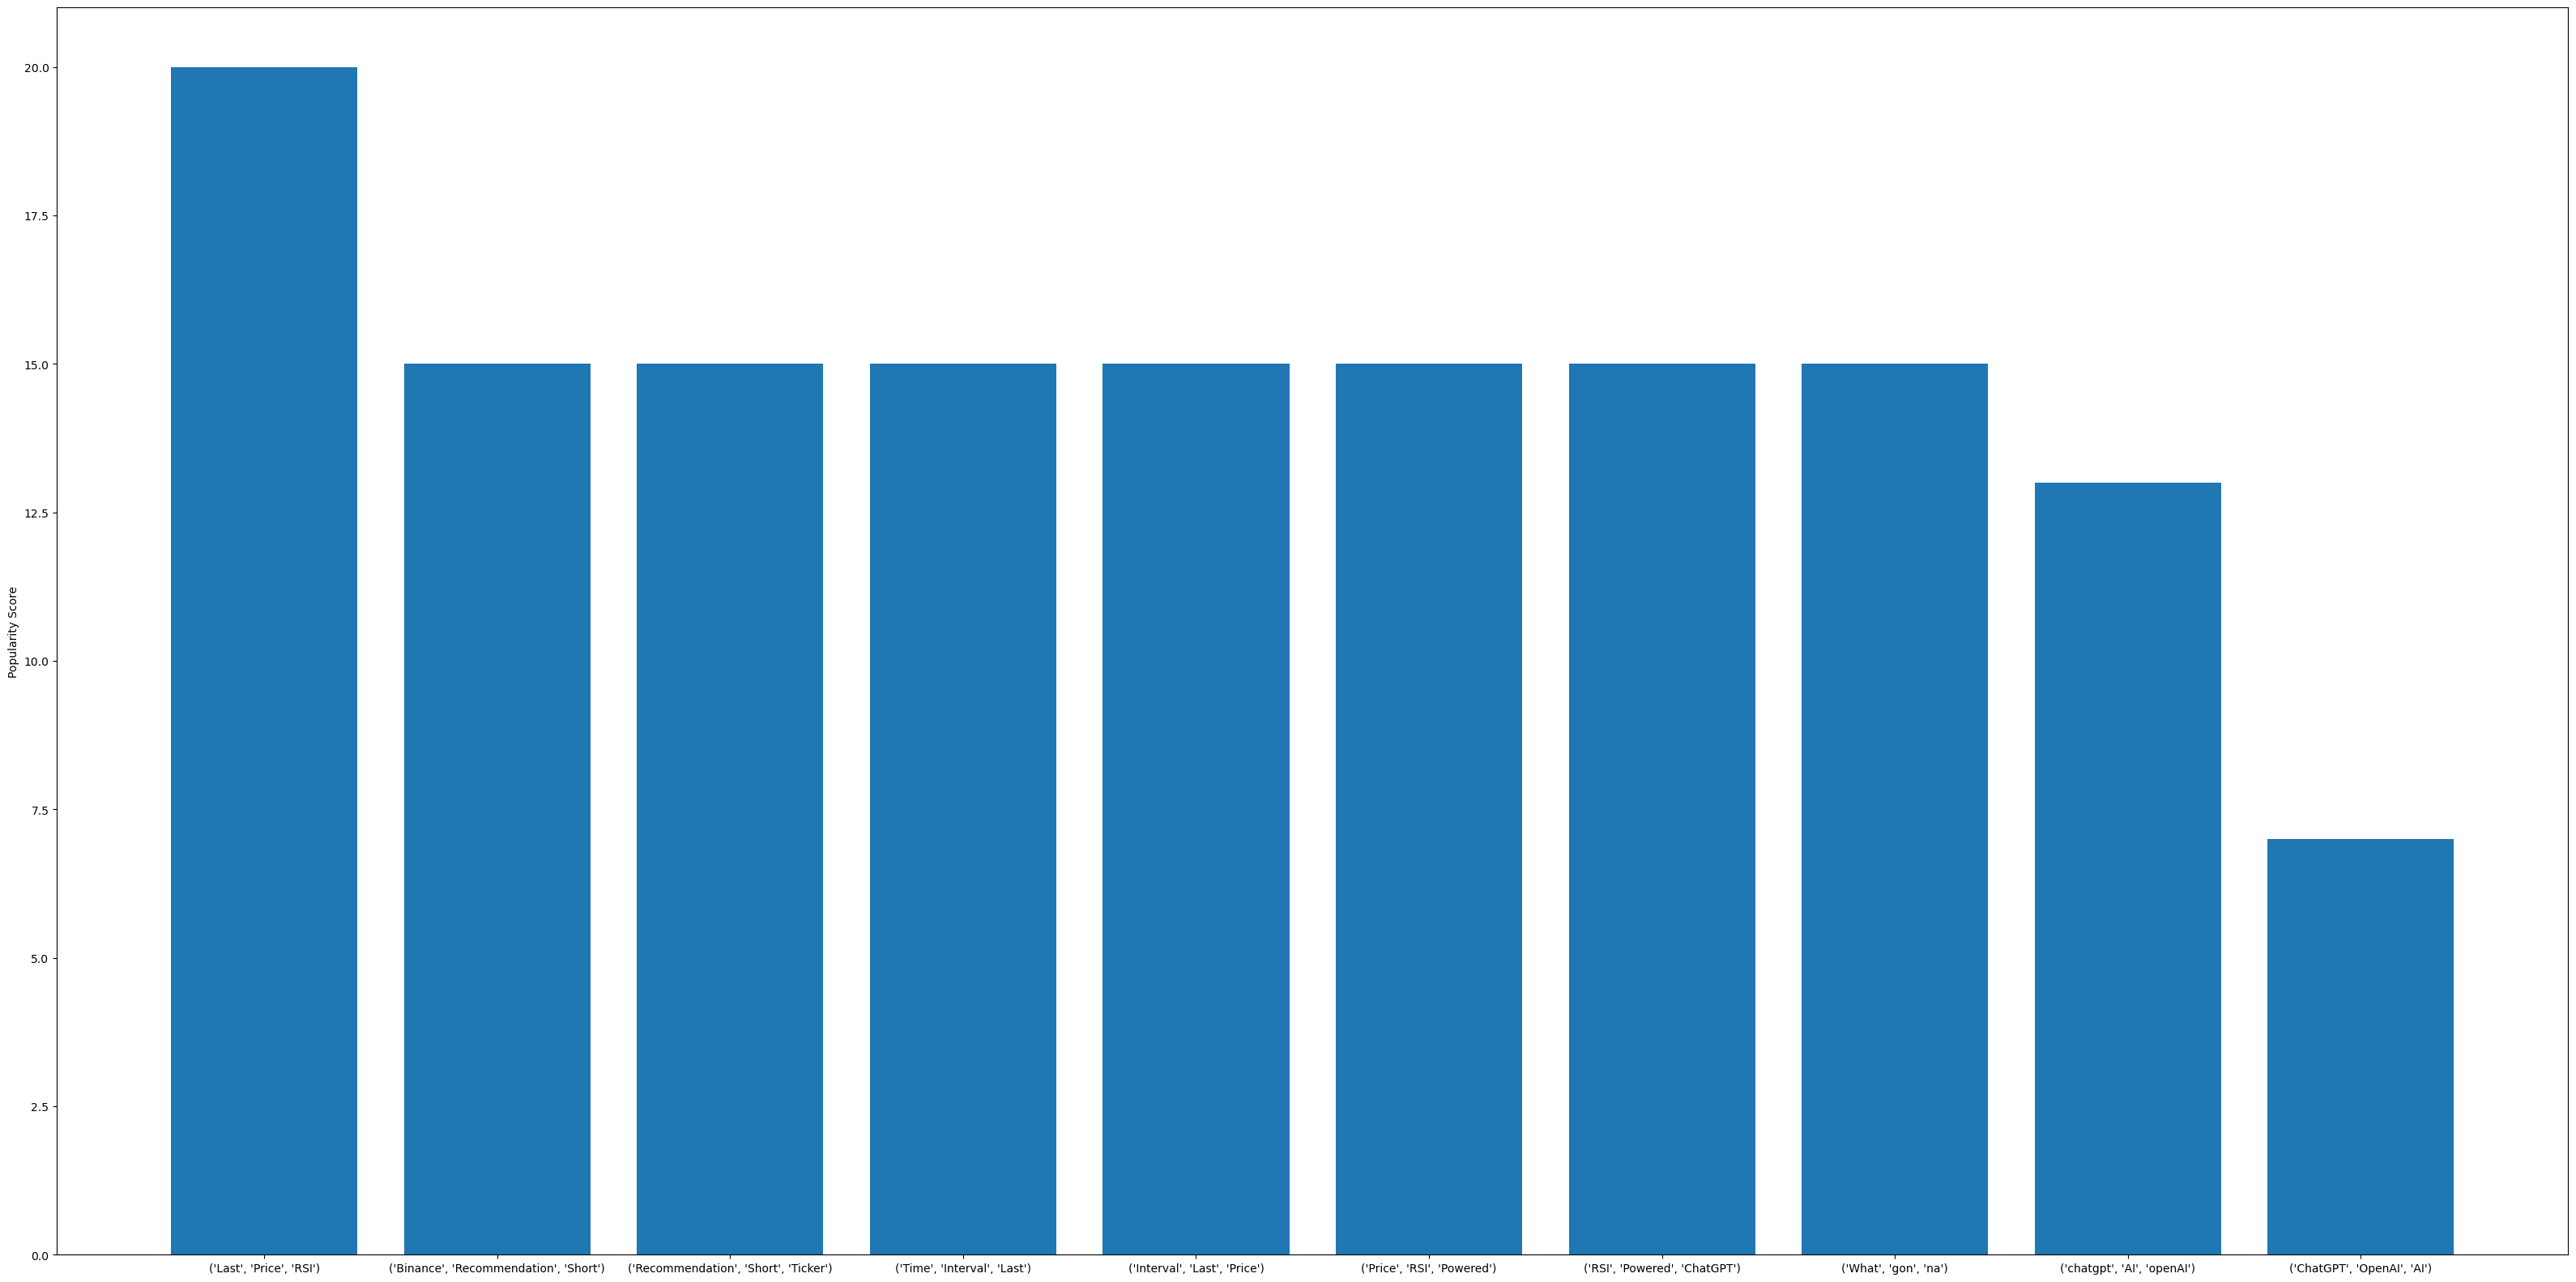

In [20]:
plot_data(trigrams)

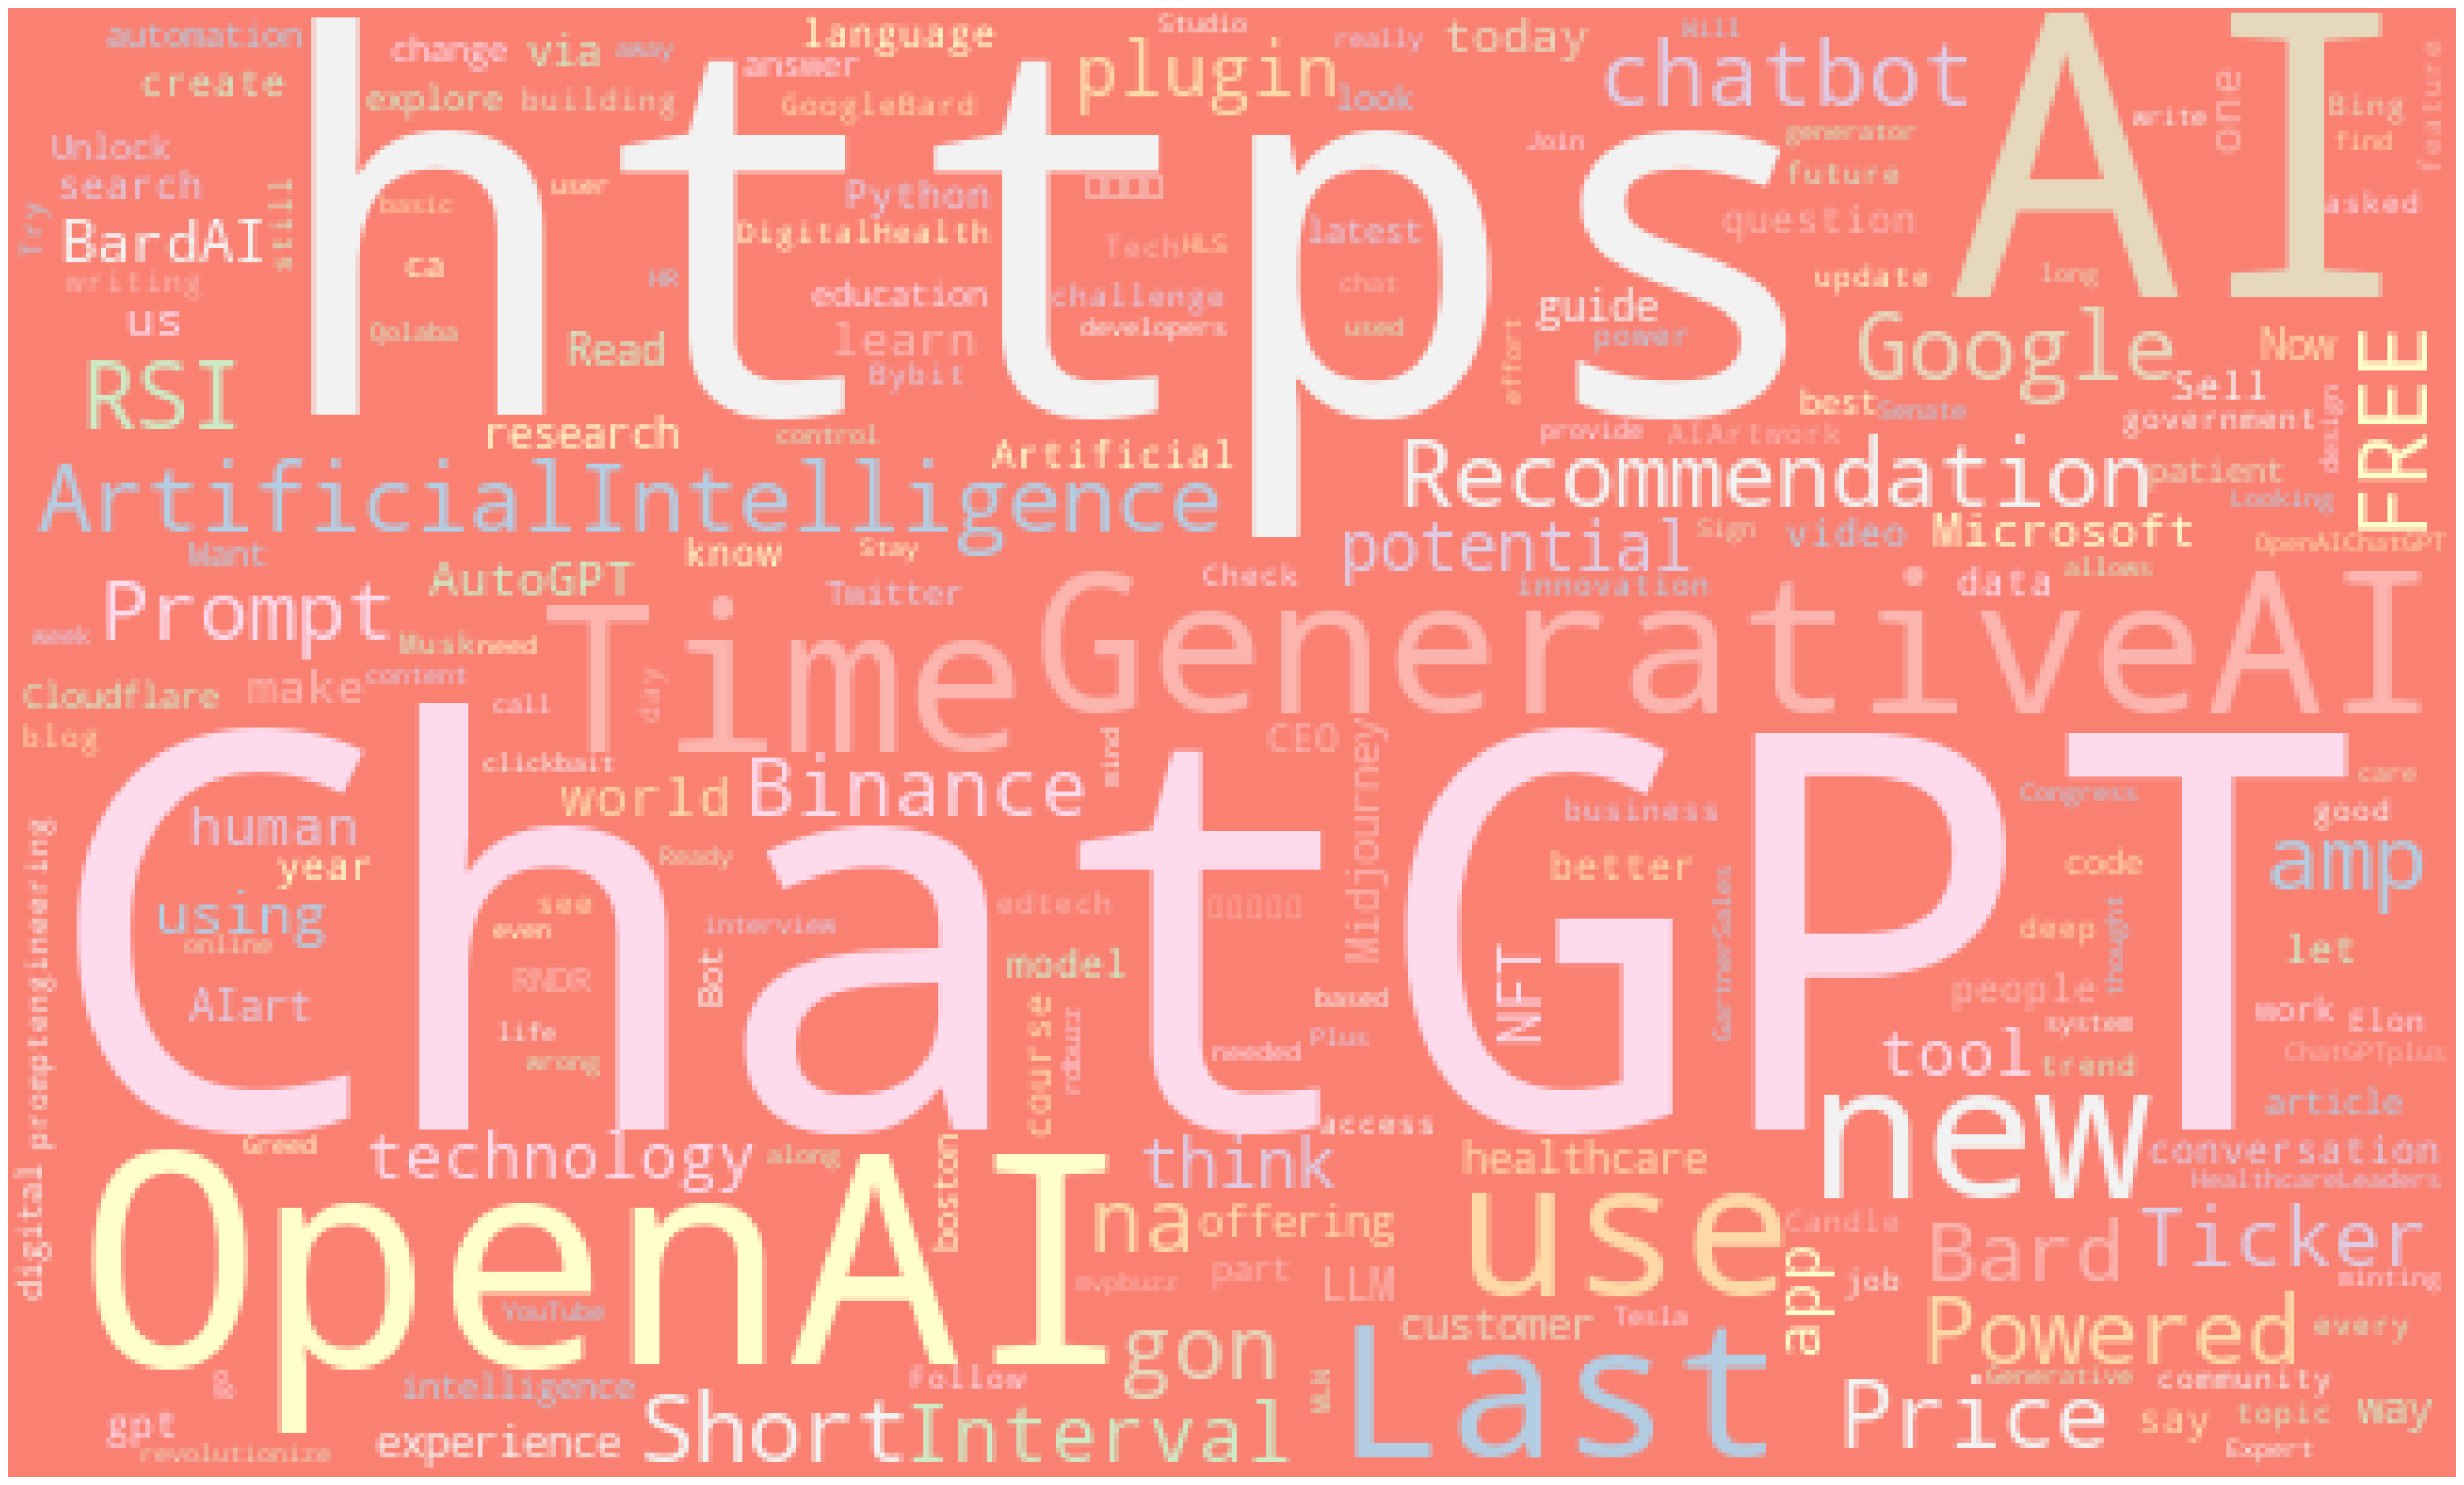

In [21]:
plot_cloud(df["stop_words_punc_removed"])

<h1>Sentimental Analysis

In [44]:
#sentiment analysis using textblob
def sentiment_labeling(data):
    label = []

    for d in data:
        pol = TextBlob(d).polarity
        if pol > 0:
            l = "Positive"  
        elif pol < 0:
            l = "Negative" 
        else:
            l = "Neutral"
        label.append(l)
        
    return label

In [46]:
#sentiment analysis using roberta
def roberta_labeling(data):
    def preprocess(text):
        new_text = []
    
        for t in text.split(" "):
            t = '@user' if t.startswith('@') and len(t) > 1 else t
            t = 'http' if t.startswith('http') else t
            new_text.append(t)
        return " ".join(new_text)

    # Tasks:
    # emoji, emotion, hate, irony, offensive, sentiment
    # stance/abortion, stance/atheism, stance/climate, stance/feminist, stance/hillary

    task='sentiment'
    MODEL = f"cardiffnlp/twitter-roberta-base-{task}"

    tokenizer = AutoTokenizer.from_pretrained(MODEL)

    # download label mapping
    labels=[]
    mapping_link = f"https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/{task}/mapping.txt"
    with urllib.request.urlopen(mapping_link) as f:
        html = f.read().decode('utf-8').split("\n")
        csvreader = csv.reader(html, delimiter='\t')
    labels = [row[1] for row in csvreader if len(row) > 1]

    # PT
    model = AutoModelForSequenceClassification.from_pretrained(MODEL)
    model.save_pretrained(MODEL)

    final_labels = []
    for text in data:
        text = preprocess(text)
        encoded_input = tokenizer(text, return_tensors='pt')
        output = model(**encoded_input)
        scores = output[0][0].detach().numpy()
        scores = softmax(scores)

        ranking = np.argsort(scores)
        ranking = ranking[::-1]
        
        for i in range(scores.shape[0]):
            l = labels[ranking[i]]
            final_labels.append(l)
            break
    
    return final_labels

In [65]:
#final sentiment labeling
def final_label(data):
    labels = []
    for i in range(len(data)):
        if data["sentiments"][i].lower() == data["roberta_sentiment"][i].lower():
            #if labels are same, it is used
            labels.append(data["roberta_sentiment"][i].lower())
        else:
            #if labels are different, text blob label is used
            labels.append(data["sentiments"][i].lower())
            
    return labels

In [31]:
df["sentiments"] = sentiment_labeling(df["text"])
df["roberta_sentiment"] = roberta_labeling(df["text"])

In [66]:
df["final_labels"] = final_label(df)

In [67]:
df

,index,user_name,text,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,hashtags,source,stop_words_punc_removed,stems,lems,rem_links,sentiments,roberta_sentiment,final_labels
0,2,Dan Bruno AI,ChatGPT Thinks These 5 Crypto Coins Will Explo...,"Manchester, NH","The latest in #ChatGPT, #BARD, #Bing, and othe...",2021-05-19 01:19:32+00:00,0.000221,0.001395,0.014656,False,2023-05-17 18:11:03+00:00,"['chatgpt', 'AI', 'openAI']",dlvr.it,"[ChatGPT, Thinks, These, Crypto, Coins, Will, ...","[chatgpt, think, these, crypto, coin, will, ex...","[ChatGPT, Thinks, These, Crypto, Coins, Will, ...","[ChatGPT, Thinks, These, Crypto, Coins, Will, ...",Neutral,positive,neutral
1,3,Georgiana Comsa,New: @JWVance's post about 5 #startups (includ...,Palo Alto,"Founder of Silicon Valley PR, award-winning PR...",2008-12-24 09:32:23+00:00,0.001823,0.016732,0.006826,False,2023-05-17 18:10:25+00:00,"['startups', 'startup50']",Twitter Web App,"[New, JWVance, post, startups, including, Vcin...","[new, jwvanc, post, startup, includ, vcinityin...","[New, JWVance, post, startup, including, Vcini...","[New, JWVance, post, startups, including, Vcin...",Positive,positive,positive
2,4,Bitone Great,🚨Get Out!🚨\n💰#Binance Spot💰\n⬇ Recommendation:...,Hong Kong,#ChatGPT (AI) powered Free Trading Signal! \nL...,2022-11-21 04:42:18+00:00,0.000716,0.004496,0.000181,False,2023-05-17 18:09:39+00:00,"['Binance', 'Short', 'GHSTUSDT']",rsi1,"[Out, Binance, Recommendation, Short, Ticker, ...","[out, binanc, recommend, short, ticker, ghstus...","[Out, Binance, Recommendation, Short, Ticker, ...","[Out, Binance, Recommendation, Short, Ticker, ...",Neutral,neutral,neutral
3,6,ScrapeLogo: acquired by RiteKit in 2015,Video : Show a company's logo based on the web...,"Prague, Czech Republic",Test RiteKit #RESTAPI solutions in demo page. ...,2015-01-31 04:13:07+00:00,0.000083,0.000480,0.000774,False,2023-05-17 18:09:04+00:00,['Short'],RiteKit App,"[Video, Show, company, logo, based, website, d...","[video, show, compani, logo, base, websit, dom...","[Video, Show, company, logo, based, website, d...","[Video, Show, company, logo, based, website, d...",Neutral,neutral,neutral
4,7,vigilance.eth™️ 0x676D | 🇨🇦🇮🇪🇬🇧🇨🇵,I just used my #CerberusGPT HologeneticsLab an...,"London, ON",🇨🇦 #blockchain #ai #ChatGPT #promptcraft 🤖wiza...,2021-01-30 21:03:36+00:00,0.000058,0.002657,0.025264,False,2023-05-17 18:09:00+00:00,['CerberusGPT'],Twitter Web App,"[I, used, CerberusGPT, HologeneticsLab, simula...","[i, use, cerberusgpt, hologeneticslab, simul, ...","[I, used, CerberusGPT, HologeneticsLab, simula...","[I, used, CerberusGPT, HologeneticsLab, simula...",Negative,neutral,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,493,Kristina Lucrezia Cornèr,"am i that lucky, or #chatGPT constantly makes ...","Veneto, Italy","See beyond, question more, believe in impossib...",2018-02-12 12:17:29+00:00,0.001429,0.004292,0.003118,False,2023-05-17 16:00:54+00:00,['chatGPT'],Twitter Web App,"[lucky, chatGPT, constantly, makes, errors, er...","[lucki, chatgpt, constantli, make, error, erro...","[lucky, chatGPT, constantly, make, error, erro...","[lucky, chatGPT, constantly, makes, errors, er...",Positive,negative,positive
270,494,Janice Portal | AI Enthusiast | Virtual Assistant,"Hi everyone, just want to share again my AI-ge...","Boracay, Philippines","Part-time Freelancer, Crypto & AI Enthusiast, ...",2023-03-07 16:18:50+00:00,0.000006,0.000658,0.000093,False,2023-05-17 16:00:40+00:00,"['ChatGPT', 'OPENAI']",Twitter Web App,"[Hi, everyone, want, share, blogs, https, Chat...","[hi, everyon, want, share, blog, http, chatgpt...","[Hi, everyone, want, share, blog, http, ChatGP...","[Hi, everyone, want, share, blogs, ChatGPT, OP...",Neutral,positive,neutral
271,495,O'Dwyer's PR News,#ChatGPT set off an endless stream of fear and...,"New York, NY","The #1 news outlet for public relations, publi...",2009-02-25 15:5